In [1]:
import cv2
import os
import random
random.seed(255)
import imutils
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def display(image, flip=True, cmap=None, figsize=(6, 6), **kwargs):
    if flip:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
    # adjustment for histograms
    if kwargs.get("is_histogram", False):
        plt.figure(figsize=figsize)
        plt.plot(image)
    else:
        width=image.shape[1] 
        height=image.shape[0]
        margin=50 
        # dots per inch
        dpi=100.
        # inches
        figsize=((width+2*margin)/dpi, (height+2*margin)/dpi)
        #axes ratio
        left = margin/dpi/figsize[0] 
        bottom = margin/dpi/figsize[1]
        fig = plt.figure(figsize=figsize, dpi=dpi)
        fig.subplots_adjust(left=left, bottom=bottom, right=1.-left, top=1.-bottom)
        _ = plt.imshow(image, cmap=cmap)
        plt.axis("off")
    plt.title(kwargs.get("title", None))
    plt.xlabel(kwargs.get("xlabel", None))
    plt.ylabel(kwargs.get("ylabel", None))
    plt.xlim(kwargs.get("xlim", None))
    plt.show()
    
def display_histogram(histograms, figsize=(6, 6), **kwargs):
    plt.figure(figsize=figsize)
    plt.title(kwargs.get("title", None))
    plt.xlabel(kwargs.get("xlabel", None))
    plt.ylabel(kwargs.get("ylabel", None))
    plt.xlim(kwargs.get("xlim", None))
    for h, c in histograms:
        plt.plot(h, color=c)
    plt.show()
    
def resize(image, width=None, height=None, inter=cv2.INTER_AREA):
    # initialize the dimensions of the image to be resized and
    # grab the image size
    dim = None
    (h, w) = image.shape[:2]
    
    # if both the width and height are None, then return the
    # original image
    if width is None and height is None:
        return image
    
    # check to see if the width is None
    if width is None:
        # calculate the ratio of the height and construct the
        # dimensions
        r = height / float(h)
        dim = (int(w * r), height)
    # otherwise, the height is None
    else:
        # calculate the ratio of the width and construct the
        # dimensions
        r = width / float(w)
        dim = (width, int(h * r))
    # resize the image
    resized = cv2.resize(image, dim, interpolation=inter)
    # return the resized image
    return resized

#### Introduction

Connected-component labeling (also known as connected-component analysis, blob extraction, or region labeling) is an algorithmic application of graph theory that is used to determine the connectivity of “blob”-like regions in a binary image.

In [2]:
from skimage.filters import threshold_local
from skimage import measure

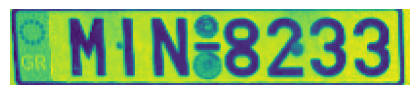

In [24]:
image = cv2.imread("images/license_plate_2.png")
# convert to hsv and get value
v = cv2.split(cv2.cvtColor(image, cv2.COLOR_BGR2HSV))[2]
display(v, flip=False, cmap=None)

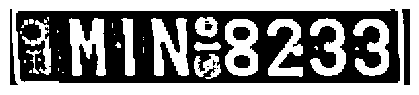

In [25]:
# adaptive theresholding .. pay attention
thresholded = cv2.adaptiveThreshold(
    src=v, 
    maxValue=255, 
    adaptiveMethod=cv2.ADAPTIVE_THRESH_MEAN_C,
    thresholdType=cv2.THRESH_BINARY_INV,
    blockSize=17,
    C=3
)
display(thresholded, flip=False, cmap="gray")

In [34]:
# perform connected component labelling 
labels = measure.label(thresholded, connectivity=2, background=0)
mask = np.zeros(thresholded.shape, dtype="uint8")
print("Number of blobs found: {}".format(len(np.unicode(labels))))

Number of blobs found: 119


Label: 0 (background)
Label: 1 (foreground)


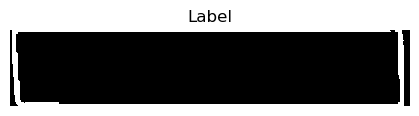

Label: 2 (foreground)


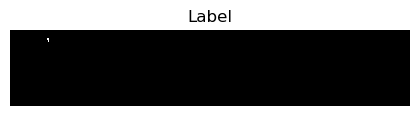

Label: 3 (foreground)


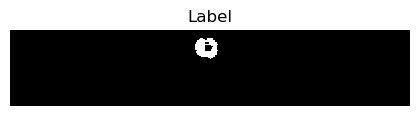

Label: 4 (foreground)


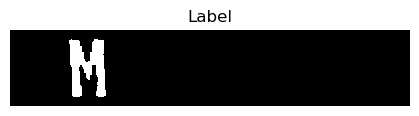

Label: 5 (foreground)


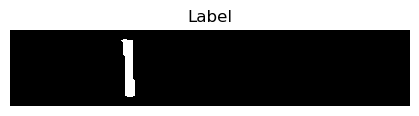

Label: 6 (foreground)


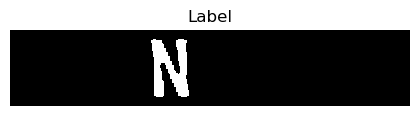

Label: 7 (foreground)


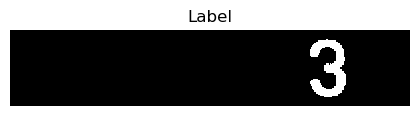

Label: 8 (foreground)


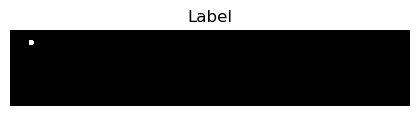

Label: 9 (foreground)


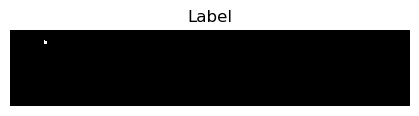

Label: 10 (foreground)


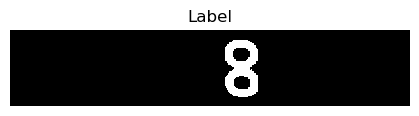

Label: 11 (foreground)


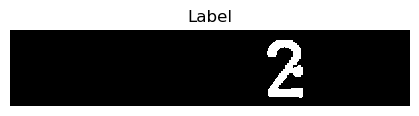

Label: 12 (foreground)


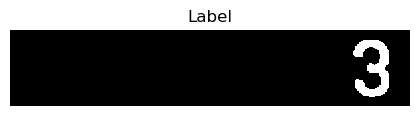

Label: 13 (foreground)


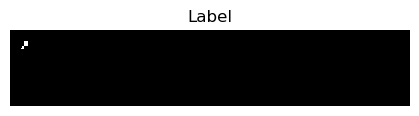

Label: 14 (foreground)


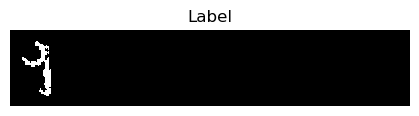

Label: 15 (foreground)


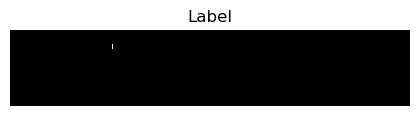

Label: 16 (foreground)


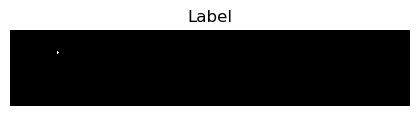

Label: 17 (foreground)


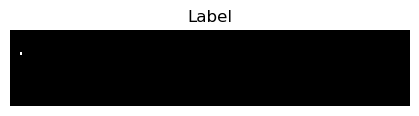

Label: 18 (foreground)


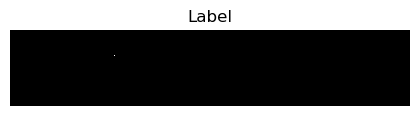

Label: 19 (foreground)


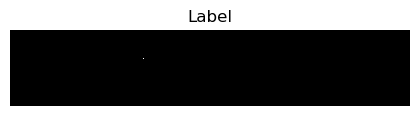

Label: 20 (foreground)


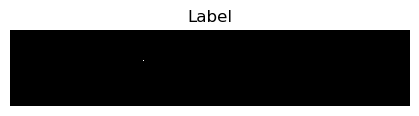

Label: 21 (foreground)


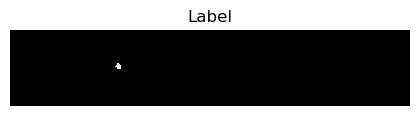

Label: 22 (foreground)


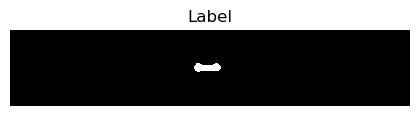

Label: 23 (foreground)


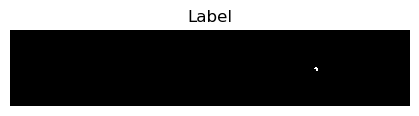

Label: 24 (foreground)


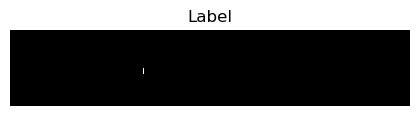

Label: 25 (foreground)


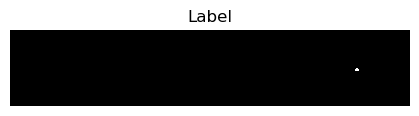

Label: 26 (foreground)


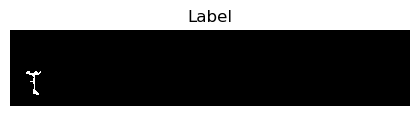

Label: 27 (foreground)


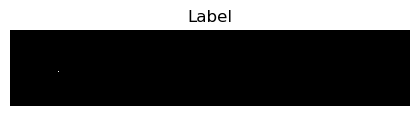

Label: 28 (foreground)


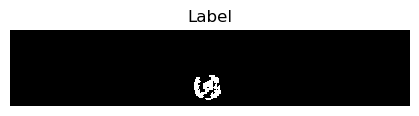

Label: 29 (foreground)


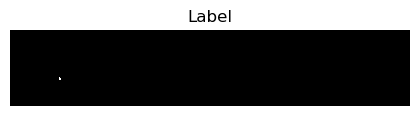

Label: 30 (foreground)


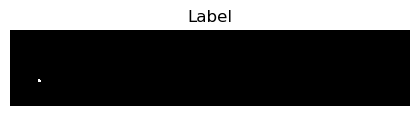

Label: 31 (foreground)


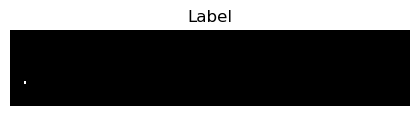

Label: 32 (foreground)


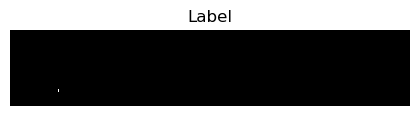

Label: 33 (foreground)


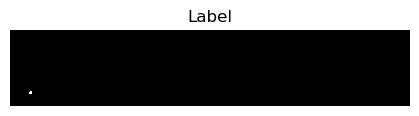

Label: 34 (foreground)


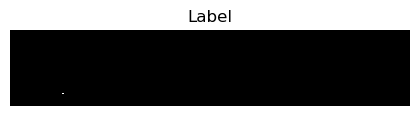

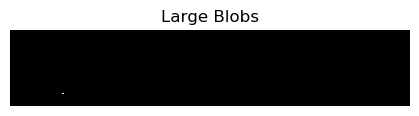

In [35]:
# loop over labels
for i, label in enumerate(np.unique(labels)):
    
    # if this is background label ignore it
    if label == 0:
        print("Label: 0 (background)")
        continue
        
    # else
    print("Label: {} (foreground)".format(i))
    label_mask = np.zeros(thresholded.shape, dtype="uint8")
    label_mask[labels == label] = 255
    num_pixels = cv2.countNonZero(label_mask)
    
    # if the number of pixels in the component is sufficiently large, add it to our mask of large blobs
    if num_pixels > 300 and num_pixels < 1500:
        mask = cv2.add(mask, label_mask)
    
    # show
    display(label_mask, flip=False, cmap="gray", title="Label")
    
display(label_mask, flip=False, cmap="gray", title="Large Blobs")